In [ ]:
import pandas as pd
import seaborn as sbn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [ ]:
heart = pd.read_csv('/content/heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)
media = np.mean(heart)
media

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

In [ ]:
mediana = np.median(heart)
mediana

1.0

In [ ]:
varianza = np.var(heart)
varianza

age           82.212332
sex            0.216449
cp             1.061617
trestbps     306.571317
chol        2677.560653
fbs            0.126458
restecg        0.275616
thalach      522.914899
exang          0.219978
oldpeak        1.343646
slope          0.378481
ca             1.042273
thal           0.373645
target         0.248015
dtype: float64

In [ ]:
desviacion_tipica = np.std(heart)
desviacion_tipica

age          9.067102
sex          0.465241
cp           1.030348
trestbps    17.509178
chol        51.745151
fbs          0.355610
restecg      0.524991
thalach     22.867333
exang        0.469019
oldpeak      1.159157
slope        0.615208
ca           1.020918
thal         0.611265
target       0.498011
dtype: float64

In [ ]:
minimo = heart.min()
minimo

age          29.0
sex           0.0
cp            0.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          0.0
target        0.0
dtype: float64

In [ ]:
maximo = heart.max()
maximo

age          77.0
sex           1.0
cp            3.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64

In [ ]:
Q1 = np.quantile(heart,0.25)
Q1

0.0

In [ ]:
Q3 = np.quantile(heart,0.75)
Q3

55.0

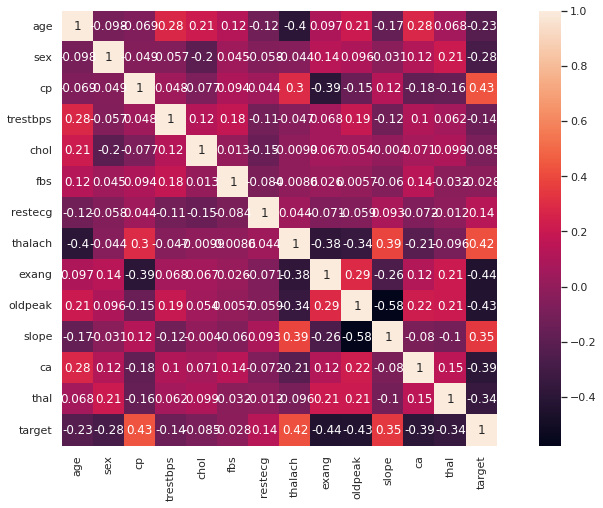

In [ ]:
# Mostrar un mapa de calor que indique la correlación entre variables
sbn.set(rc = {'figure.figsize':(15,8)})
sbn.heatmap(heart.corr(), square=True, annot=True)

In [ ]:
# Seleccionar las características a tener en cuenta en el estudio
#Se implementa en la parte de optimizacion

In [ ]:
# Separar datos entre datos de entrada y etiquetas (resultados)
x_heart = heart.drop('target', axis = 1)
y_heart = heart['target']
y_heart


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
# Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)
x_train, x_test, y_train, y_test = train_test_split(x_heart,y_heart, random_state=1, test_size=0.25)

Entrenamiento y prediccion

In [ ]:
# Elegir, instanciar (eligiendo unos valores concretos, por ejemplo k=3 y w=’uniform’) y entrenar el modelo
k = 3
w = 'uniform'

model = KNeighborsClassifier(3, weights=w)
model.fit(x_train, y_train)

# Realizar una predicción con los datos de prueba
y_model = model.predict(x_test)

In [ ]:
# Mostrar el porcentaje de elementos correctamente clasificados

accuracy_score(y_test,y_model)

0.5789473684210527

In [ ]:
# Mostrar la predicción realizada (imprimir la variable con la predicción)
for i in (0,len(y_model)-1):
  print("prediccion: {a} real: {b}".format(a = y_model[i], b = y_heart[i]))

prediccion: 0 real: 1
prediccion: 0 real: 1


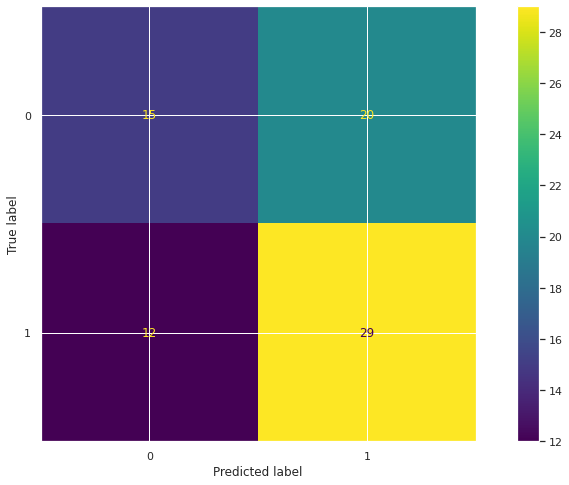

In [ ]:
# Representar gráficamente la clasificación obtenida (matriz de confusión)
ConfusionMatrixDisplay.from_predictions(y_test,y_model)

Optimizacion

In [ ]:
def validacion_cruzada_cl(model, x, y, kf):
  fold_accuracy = []
  for train_fold, test_fold in kf.split(x):
    x_train_fold = x.iloc[train_fold]
    y_train_fold = y.iloc[train_fold]
    x_test_fold = x.iloc[test_fold]
    y_test_fold = y.iloc[test_fold]
    model.fit(x_train_fold, y_train_fold)
    y_pred = model.predict(x_test_fold)
    acc = accuracy_score(y_test_fold, y_pred)
    fold_accuracy.append(acc)
  media_score = sum(fold_accuracy)/len(fold_accuracy)
  return media_score

In [ ]:
kf = KFold(n_splits = 5)

for w in ['uniform','distance']:
  for k in range(1,31):
    model_opti = KNeighborsClassifier(k, weights=w)
    media_cruzada = validacion_cruzada_cl(model_opti,x_train,y_train,kf)
    print("Para k: {k} y w: {w} la media es: {m}".format(k=k,w=w,m=media_cruzada))

Para k: 1 y w: uniform la media es: 0.6385507246376811
Para k: 2 y w: uniform la media es: 0.6029951690821257
Para k: 3 y w: uniform la media es: 0.6608695652173913
Para k: 4 y w: uniform la media es: 0.6432850241545893
Para k: 5 y w: uniform la media es: 0.6652173913043479
Para k: 6 y w: uniform la media es: 0.629855072463768
Para k: 7 y w: uniform la media es: 0.6698550724637681
Para k: 8 y w: uniform la media es: 0.6566183574879227
Para k: 9 y w: uniform la media es: 0.6476328502415459
Para k: 10 y w: uniform la media es: 0.630048309178744
Para k: 11 y w: uniform la media es: 0.6695652173913044
Para k: 12 y w: uniform la media es: 0.6299516908212561
Para k: 13 y w: uniform la media es: 0.6520772946859903
Para k: 14 y w: uniform la media es: 0.6477294685990338
Para k: 15 y w: uniform la media es: 0.6519806763285023
Para k: 16 y w: uniform la media es: 0.6388405797101449
Para k: 17 y w: uniform la media es: 0.6608695652173913
Para k: 18 y w: uniform la media es: 0.647536231884058
Para

In [ ]:
for w in ['uniform','distance']:
  for k in range(1,31):
    model_opti = KNeighborsClassifier(k, weights=w)
    media_cruzada = validacion_cruzada_cl(model_opti,x_train,y_train,kf)
    if media_cruzada > 0.67:
      print("Para k: {k} y w: {w} la media es: {m}".format(k=k,w=w,m=media_cruzada))

Para k: 17 y w: distance la media es: 0.6739130434782608
Para k: 30 y w: distance la media es: 0.6739130434782609
